In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
lower_temp = 295 #K
lower_volume = 1.0 #L
higher_temp = 355 #K
higher_volume = 2.1 #L

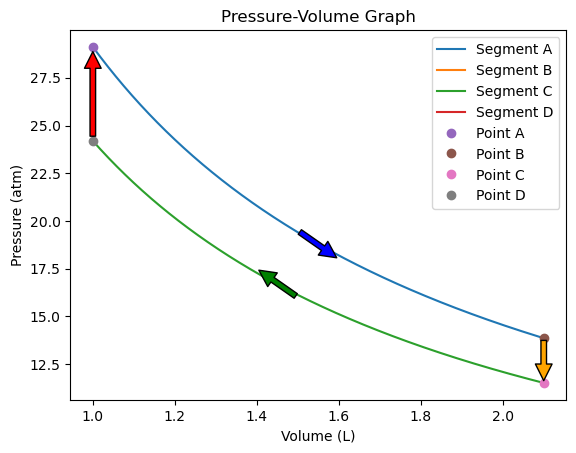

In [3]:
#defining a pressure function to give me a pressure associated with a specific temperature 
#and volume 
#I want my pressure to be in atm and volume in liters so the graph makes more sense and have to 
#convert to SI units in this function - multiplying by 101325 Pa insures that my pressure will be in 
#atm and dividing by 1000L insures that my volume is in the standard SI unit, cubic meters 
def pressure(T, V):
    N = 6.022 * 10 ** (23) #number of particles
    K = 1.38 * 10 **(-23) #J/K
    P = ((N * K * T) / (V * 101325))*1000 #gives pressure in atm
    return P

#making a range for my volumes so that I have 1000 points rather than two, same for temperature so 
#that it corresponds with the volume 
volume = np.linspace(lower_volume, higher_volume, 1000)
temp = np.linspace(lower_temp, higher_temp, 1000)
temp1 = np.linspace(higher_temp, lower_temp, 1000)
#this temperature goes from higher to lower because after we complete our first isothermal and 
#isochoric processes, another isothermal process will take place that decreases the volume and 
#increases the pressure 

#creating a pressure array to append new pressure values depending on temp and volume for my 
#isothermal processes temperature does not change, but I still wanted to iterate my pressure 
#through volume and temperature to make it even
pressure_array = []
for t in temp:
    p_vals = pressure(t, volume)
    pressure_array.append(p_vals)

#gives the end-point pressures for the isochoric part of the graph    
isochoric1 = pressure(lower_temp, higher_volume)
isochoric2 = pressure(higher_temp, lower_volume)

#creates pressure array for the isochoric part of graph where temperature is going from low to high 
pressure1_array = []
for t in temp1:
    p_vals1 = pressure(t, volume)
    pressure1_array.append(p_vals1)
    
plt.plot(volume, p_vals, label='Segment A')
#plots increasing volume and decreasing pressure during a constant temperature 
plt.plot([higher_volume, higher_volume], [isochoric1, p_vals[999]], label='Segment B')
#plots a constant volume against a decreasing pressure with a decreasing temperature 
plt.plot(volume, p_vals1, label='Segment C')
#plots a decreasing volume against an increasing pressure with a constant temperature 
plt.plot([lower_volume, lower_volume], [isochoric2, p_vals1[0]], label='Segment D')
#plots a constant volume against an increasing pressure with an increasing temperature 
plt.plot(volume[0], p_vals[0], 'o', label='Point A')
plt.plot(volume[999], p_vals[999], 'o', label='Point B')
plt.plot(volume[999], p_vals1[999], 'o', label='Point C')
plt.plot(volume[0], p_vals1[0], 'o', label='Point D')
#adding arrows
plt.annotate('', xy =(2.1, p_vals1[999]), xytext =(2.1, p_vals[999]),arrowprops = 
             dict(facecolor ='orange', shrink = 0.05),) 
plt.annotate('', xy =(1.0, p_vals[0]), xytext =(1.0, p_vals1[0]),arrowprops = 
             dict(facecolor ='red', shrink = 0.05),) 
plt.annotate('', xy =(1.6, 18), xytext =(1.5, 19.5),arrowprops = 
             dict(facecolor ='blue', shrink = 0.05),)
plt.annotate('', xy =(1.4, 17.5), xytext =(1.5, 16),arrowprops = 
             dict(facecolor ='green', shrink = 0.05),)
plt.title("Pressure-Volume Graph")
plt.xlabel("Volume (L)")
plt.ylabel("Pressure (atm)")
plt.legend()
plt.show()

In [4]:
area_under_curve = np.trapz(volume, p_vals)
#work for first isothermal part
workA = area_under_curve*101325/1000
#converting the work back to SI units since the graph is in atm and liters 
#work is the area under a PV diagram 
#we expect work to be negative since the volume is increasing and the gas is hitting the 
#container less
area_under_curve1 = np.trapz(volume, p_vals1)
#work for second isothermal part
workC = -area_under_curve1*101325/1000
#converting work to SI units
#we expect work to be positive since the volume is decreasing and the gas is colliding with the 
#container walls more
net_work = workA + workC
print("The work for segment A is:", np.round(workA, decimals=-2), "J")
print("The work for segment C is:", np.round(workC, decimals=-2), "J")
print("The net work of the system is:", np.round(net_work, decimals=-1), "J")

The work for segment A is: -2200.0 J
The work for segment C is: 1800.0 J
The net work of the system is: -370.0 J


In [10]:
#defining a temperature function to return temperature to corresponding pressure and volume knowns 
#I did this to make sure that my isothermal processes were not changing temperature and only 
#the isochoric processes were changing temperature 
def temp(P, V):
    N = 6.022 * 10 ** (23) #number of particles
    K = 1.38 * 10 **(-23) #J/K
    T = (101325) * (1/1000) * ((P * V) / (N * K))
    return T

temp_at_A = temp(isochoric2, lower_volume)
temp_at_B = temp(p_vals[999], higher_volume)
#temp_at_A = temp_at_B
temp_at_C = temp(isochoric1, higher_volume)
temp_at_D = temp(p_vals1[0], lower_volume)
#temp_at_C = temp_at_D
#temp_at_A is not equal to temp_at_D

#defining an equation to find kinetic energy based on the temperature 
#we need this to use the first law of thermodynamics and find the change of heat at each point
def kinetic_energy(T):
    N = 6.022 * 10 ** (23) #number of particles
    K = 1.38 * 10 **(-23) #J/K
    f = 3 #monatomic, given
    KE = (f/2) * N * K * T
    return KE #J

#finding the kinetic energies at each point
KE_A = kinetic_energy(temp_at_A)
KE_B = kinetic_energy(temp_at_B)
KE_C = kinetic_energy(temp_at_C)
KE_D = kinetic_energy(temp_at_D)

#using the first law of thermodynamics to solve for the change in heat
#we know that the change in total kinetic energy = the change in total energy because. . . 
#KE_bulk = 0 because the container is at rest throughout the data collection
#PE_bulk = 0 because during data collection, the container remains at the same height 
#PE_internal = 0 because there are no new bonds forming
#E_rest = 0 because there is no adding or removing particles (constant number of moles given)
#E_chem = 0 because bonds aren't forming or breaking 
def heat(deltaKE, W):
    deltaQ = deltaKE - W
    return deltaQ

#finding the change in heat depending on the change of kinetic energy and the work associated 
#work for the isochoric processes is zero because the volume is constant 
deltaQ_AB = heat(KE_B - KE_A, workA)
deltaQ_BC = heat(KE_C - KE_B, 0)
deltaQ_CD = heat(KE_D - KE_C, workC)
deltaQ_DA = heat(KE_A - KE_D, 0)
print("The heat for segment A is:", np.round(deltaQ_AB, decimals=-2), "J")
print("The heat for segment B is:", np.round(deltaQ_BC, decimals=-1), "J")
print("The heat for segment C is:", np.round(deltaQ_CD, decimals=-2), "J")
print("The heat for segment D is:", np.round(deltaQ_DA, decimals=-1), "J")

Q_A = heat(KE_A, workA)
Q_B = heat(KE_B, 0)
Q_C = heat(KE_C, workC)
Q_D = heat(KE_D, 0)

355.0
The heat for segment A is: 2200.0 J
The heat for segment B is: -750.0 J
The heat for segment C is: -1800.0 J
The heat for segment D is: 750.0 J


In [6]:
#efficiency is defined as the net work divided by the heat put in
#knowing this, my denominator consists of the positive heat values I found from the previous part, 
#symbolizing heat being added
def efficiency(W, Q1, Q2):
    eff = (W / (Q1 + Q2)) * 100
    return eff

efficiency1 = np.absolute(efficiency(net_work, deltaQ_AB, deltaQ_DA))
print("The efficiency of the system is:", np.round(efficiency1, decimals=1), '%')

The efficiency of the system is: 12.6 %


In [9]:
#This definition is the change in entropy for the isothermal processes. We're given in the problem 
#that this system is a quasi-static state, so we can equate the change in entropy to the change in 
#heat divided by temperature
#This equates because the temperature is constant 
def change_in_entropy(deltaQ, T):
    deltaS = deltaQ / T
    return deltaS

#finding the entropy over segment A and over segment C, which are the isothermal processes
entropy_AB = change_in_entropy(deltaQ_AB, temp_at_A)
entropy_CD = change_in_entropy(deltaQ_CD, temp_at_D)

#for the isochoric processes, the temperature changes and we therefore have to find the specific 
#heat to plug into the entropy equation
def heat_capacity_isochoric(f):
    N = 6.022 * 10 ** (23) #number of particles 
    k = 1.38 * 10 ** (-23) #J/K
    C_v = (f/2) * N * k
    return C_v #J/K

#the change in entropy is equal to the heat capacity times the change in temperature 
#I integrated that equation with respect to temperature to find that the change in entropy 
#is equal to the heat capacity times the natural log of final temperature divided by initial temperature 
def change_in_entropy2(Tf, Ti):
    deltaS2 = heat_capacity_isochoric(3) * np.log(Tf/Ti)
    return deltaS2 #J/K

#plugging the final and initial temperatures in to find the change in entropy from B to C
entropy_BC = change_in_entropy2(temp_at_C, temp_at_B)
##plugging the final and initial temperatures in to find the change in entropy from B to C
entropy_DA = change_in_entropy2(temp_at_A, temp_at_D)
total_change_in_entropy = np.round(entropy_AB, decimals=2) + np.round(entropy_BC, decimals=2) + np.round(entropy_CD, decimals=2) + np.round(entropy_DA, decimals=2)
print("The change in entropy over segment A is:", np.round(entropy_AB, decimals=2), "J/K")
print("The change in entropy over segment B is:", np.round(entropy_BC, decimals=2), "J/K")
print("The change in entropy over segment C is:", np.round(entropy_CD, decimals=2), "J/K")
print("The change in entropy over segment D is:", np.round(entropy_DA, decimals=2), "J/K")
print("The total change in entropy is:", total_change_in_entropy, "J/K")
#we expect the total change in entropy to be zero because the system starts and ends in the same position

The change in entropy over segment A is: 6.17 J/K
The change in entropy over segment B is: -2.31 J/K
The change in entropy over segment C is: -6.17 J/K
The change in entropy over segment D is: 2.31 J/K
The total change in entropy is: 0.0 J/K


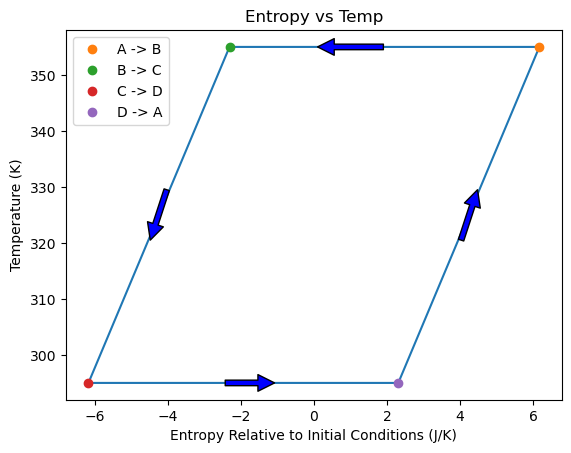

In [8]:
#plotting my entropy against temperature in arrays so that the points will connect
plt.plot([entropy_AB, entropy_BC, entropy_CD, entropy_DA, entropy_AB], 
         [temp_at_A, temp_at_B, temp_at_C, temp_at_D, temp_at_A])
#labeling my specific points separately from the curve 
plt.plot(entropy_AB, temp_at_A, 'o', label='A -> B')
plt.plot(entropy_BC, temp_at_B, 'o', label='B -> C')
plt.plot(entropy_CD, temp_at_C, 'o', label='C -> D')
plt.plot(entropy_DA, temp_at_D, 'o', label='D -> A')
plt.annotate('', xy =(0, 355), xytext =(2, 355),arrowprops = 
             dict(facecolor ='blue', shrink = 0.05),)
plt.annotate('', xy =(-4.5, 320), xytext =(-4.0, 330),arrowprops = 
             dict(facecolor ='blue', shrink = 0.05),)
plt.annotate('', xy =(-1.0, 295), xytext =(-2.5, 295),arrowprops = 
             dict(facecolor ='blue', shrink = 0.05),)
plt.annotate('', xy =(4.5, 330), xytext =(4.0, 320),arrowprops = 
             dict(facecolor ='blue', shrink = 0.05),)
plt.title('Entropy vs Temp')
plt.xlabel('Entropy Relative to Initial Conditions (J/K)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()